In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\veena\aimlfull")
os.listdir()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['.ipynb_checkpoints',
 'aadhaar_line_graph.png',
 'analysed.csv',
 'analysed.ipynb',
 'biometric2.csv',
 'biometric3.csv',
 'biometric4.csv',
 'biometrics.csv',
 'enrolment.csv',
 'enrolment1.ipynb',
 'enrolment2.csv',
 'enrolment2.ipynb',
 'enrolment3.csv',
 'enrolment3.ipynb',
 'pairplot.png',
 'pyforest.ipynb',
 'python.txt',
 'updaate5.csv',
 'update1.csv',
 'update2.csv',
 'update3.csv',
 'update4.csv']

In [3]:
df=pd.read_csv("analysed.csv")

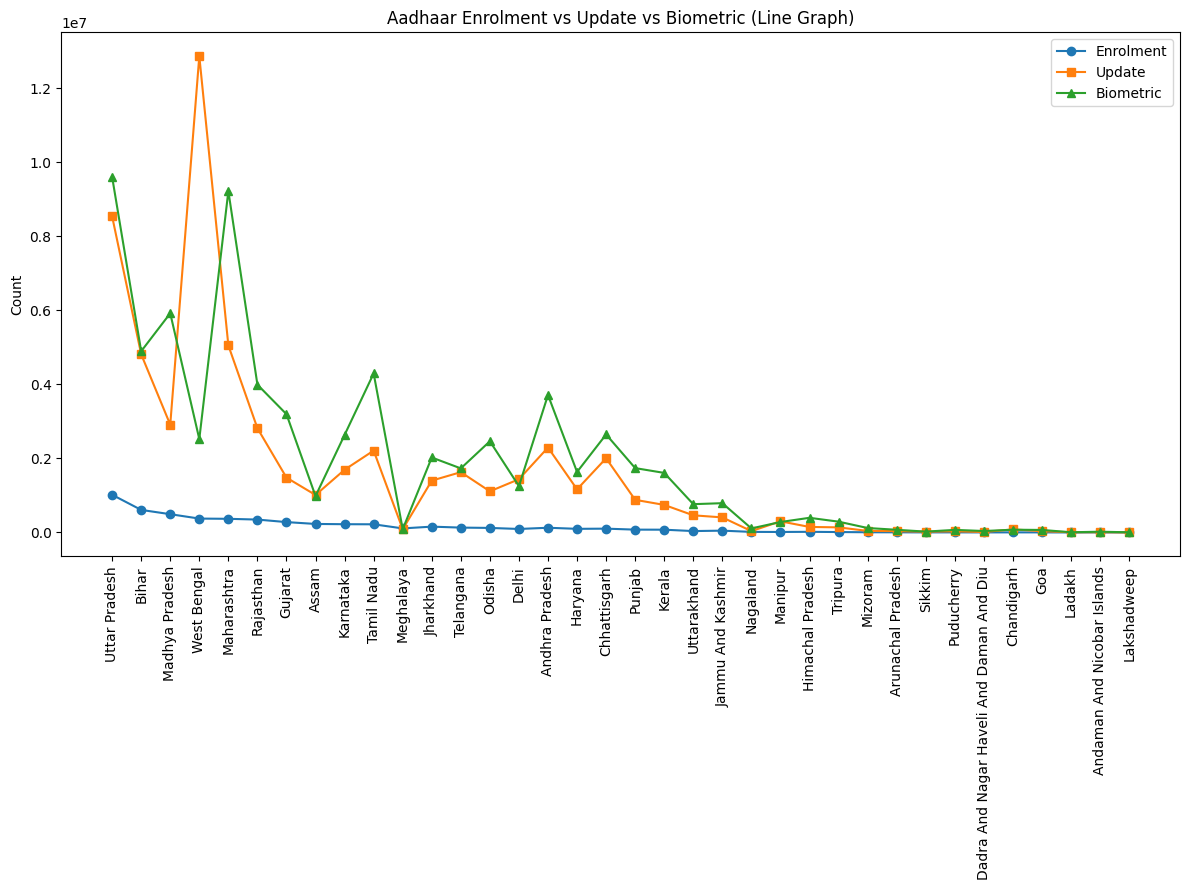

In [43]:
plt.figure(figsize=(12, 9))

plt.plot(df["State / UT"], df["enrolment"], marker='o', label="Enrolment")
plt.plot(df["State / UT"], df["update"], marker='s', label="Update")
plt.plot(df["State / UT"], df["biometric"], marker='^', label="Biometric")

# Formatting
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Aadhaar Enrolment vs Update vs Biometric (Line Graph)")
plt.legend()
plt.tight_layout()
plt.savefig("aadhaar_line_graph.png", dpi=300, bbox_inches="tight")
plt.show()


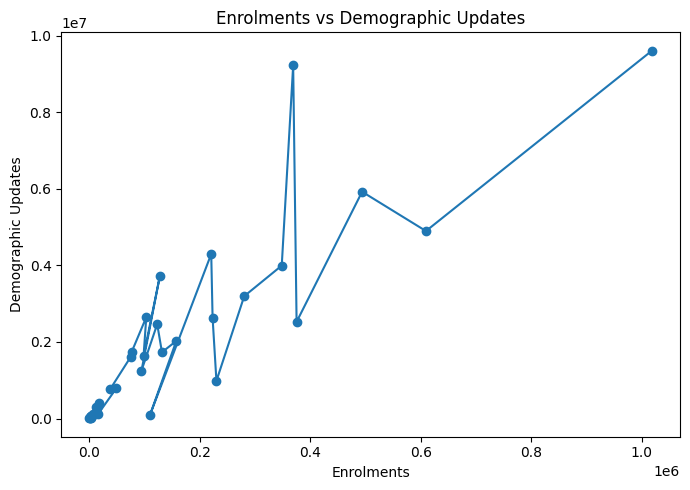

In [7]:
plt.figure(figsize=(7,5))

plt.plot(
    df['enrolment'],
    df['biometric'],
    marker='o'
)

plt.xlabel("Enrolments")
plt.ylabel("Demographic Updates")
plt.title("Enrolments vs Demographic Updates")

plt.tight_layout()
plt.show()


In [8]:
df['sustainability_index'] = (
    df['update'] + df['biometric']
) / df['enrolment']


In [9]:
df[['State / UT', 'sustainability_index']].head()


,State / UT,sustainability_index
0,Uttar Pradesh,17.818127
1,Bihar,15.932047
2,Madhya Pradesh,17.889161
3,West Bengal,41.022417
4,Maharashtra,38.686622


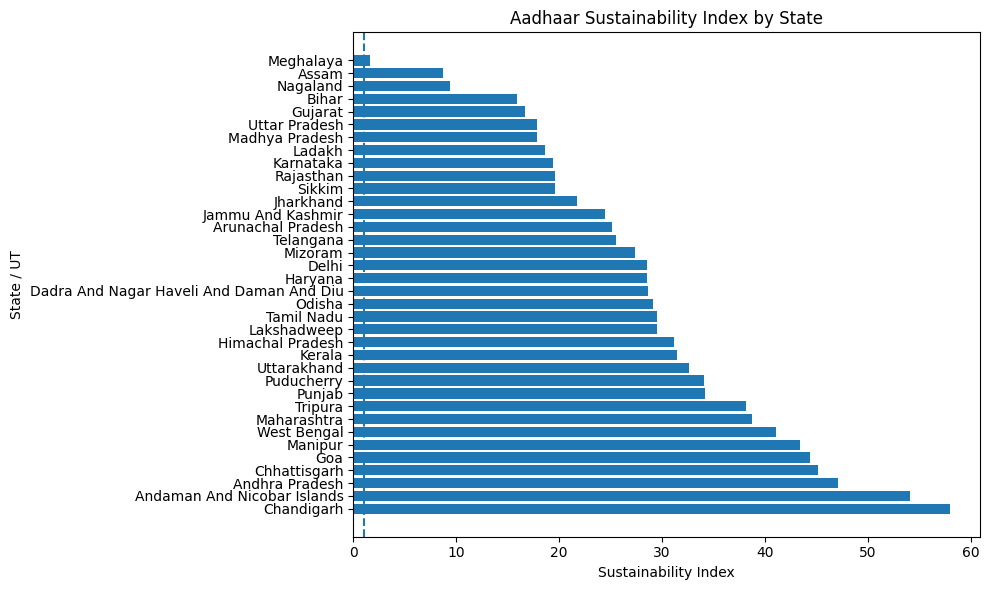

In [10]:
df_sorted = df.sort_values('sustainability_index', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(df_sorted['State / UT'], df_sorted['sustainability_index'])

plt.axvline(x=1, linestyle='--')  # threshold line

plt.xlabel("Sustainability Index")
plt.ylabel("State / UT")
plt.title("Aadhaar Sustainability Index by State")

plt.tight_layout()
plt.show()


In [12]:
df['sustainable'] = df['sustainability_index'] >= 1


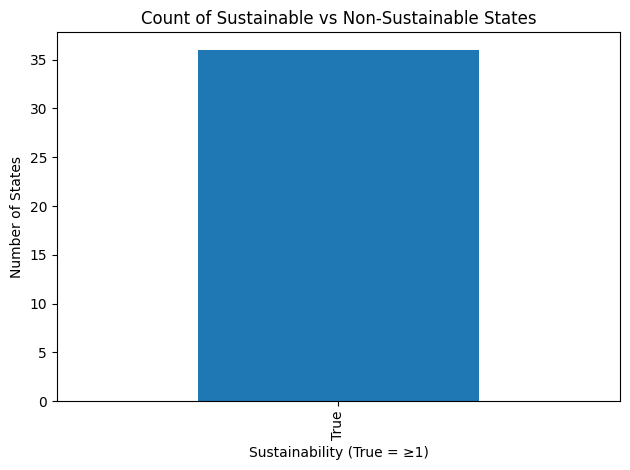

In [13]:
df['sustainable'].value_counts().plot(kind='bar')

plt.xlabel("Sustainability (True = ≥1)")
plt.ylabel("Number of States")
plt.title("Count of Sustainable vs Non-Sustainable States")

plt.tight_layout()
plt.show()


In [14]:
df[['State / UT', 'sustainability_index']] \
    .sort_values('sustainability_index', ascending=False)


,State / UT,sustainability_index
31,Chandigarh,57.966581
34,Andaman And Nicobar Islands,54.019569
15,Andhra Pradesh,47.070274
17,Chhattisgarh,45.090264
32,Goa,44.370767
23,Manipur,43.410820
3,West Bengal,41.022417
4,Maharashtra,38.686622
25,Tripura,38.118564
18,Punjab,34.158992


In [3]:
df=pd.read_csv("enrolment.csv")

In [4]:
df['state'] = df['state'].astype(str)

In [5]:
df = df[~df['state'].str.fullmatch(r'\d+')]

In [6]:
df['state'] = (
    df['state']
    .str.lower()
    .str.replace('&', 'and', regex=False)
    .str.replace('\xa0', ' ', regex=False)
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)


In [7]:
state_corrections = {
    'westbengal': 'west bengal',
    'west bangal': 'west bengal',
    'West Bengli': 'west bengal',
    'orissa': 'odisha',
    'pondicherry': 'puducherry',
    'chhatisgarh': 'chhattisgarh',
    'jammu and kashmir': 'jammu and kashmir',
    'daman and diu': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'the dadra and nagar haveli and daman and diu':
        'dadra and nagar haveli and daman and diu'
}

df['state'] = df['state'].replace(state_corrections)

In [8]:
df['state'] = df['state'].str.title()

In [9]:
df.shape
df['state'].value_counts()

state
Uttar Pradesh                               57240
Tamil Nadu                                  45087
West Bengal                                 39988
Maharashtra                                 38194
Karnataka                                   33626
Andhra Pradesh                              31471
Bihar                                       30626
Rajasthan                                   28408
Odisha                                      24663
Madhya Pradesh                              24323
Gujarat                                     22718
Telangana                                   22238
Kerala                                      17632
Assam                                       15817
Jharkhand                                   11496
Punjab                                      10499
Chhattisgarh                                 8712
Haryana                                      7529
Jammu And Kashmir                            5376
Uttarakhand                                 

In [10]:
df['total_enrolments'] = (
     df['age_5_17'] + df['demo_age_17_']
)

KeyError: 'demo_age_5_17'

In [38]:
state_enrolment_sum = (
    df.groupby('state')['total_enrolments']
    .sum()
    .sort_values(ascending=False)
)

KeyError: 'Column not found: total_enrolments'

In [39]:
state_enrolment_sum

NameError: name 'state_enrolment_sum' is not defined

In [40]:
district_count = (
    df.groupby('state')['district']
    .nunique()
    .reset_index(name='district_count')
)


In [41]:
district_count


,state,district_count
0,Andaman And Nicobar Islands,5
1,Andhra Pradesh,49
2,Arunachal Pradesh,25
3,Assam,38
4,Bihar,48
5,Chandigarh,2
6,Chhattisgarh,40
7,Dadra And Nagar Haveli And Daman And Diu,5
8,Delhi,14
9,Goa,3


In [169]:
df['state'] = (
    df['state']
    .astype(str)
    .str.lower()
    .str.replace('&', 'and', regex=False)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)


In [170]:
state_corrections = {
    # West Bengal
    'west bengal': 'west bengal',
    'west bangal': 'west bengal',
    'westbengal': 'west bengal',
    'west bengli': 'west bengal',

    # Odisha
    'odisha': 'odisha',
    'orissa': 'odisha',

    # Andhra Pradesh
    'andhra pradesh': 'andhra pradesh',

    # Jammu & Kashmir
    'jammu and kashmir': 'jammu and kashmir',

    # Puducherry
    'pondicherry': 'puducherry',

    # Andaman
    'andaman and nicobar islands': 'andaman and nicobar islands',

    # Dadra / Daman (merged UT)
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman and diu': 'dadra and nagar haveli and daman and diu',
    'the dadra and nagar haveli and daman and diu':
        'dadra and nagar haveli and daman and diu',

    # Chhattisgarh
    'chhatisgarh': 'chhattisgarh'
}


In [171]:
df['state'] = df['state'].replace(state_corrections)


In [172]:
invalid_states = ['darbhanga', 'puttenahalli']

df = df[~df['state'].isin(invalid_states)]


In [173]:
df['state'] = df['state'].str.title()


In [174]:
sorted(df['state'].unique())


['100000',
 'Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Balanagar',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra And Nagar Haveli And Daman And Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jaipur',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madanapalle',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'Uttaranchal',
 'West Bengal']

In [113]:
wb_count = df[df['state'] == 'West Bengal'].shape[0]
wb_count


40121

In [114]:
wb_district_count = (
    df[df['state'] == 'West Bengal']['district']
    .nunique()
)

wb_district_count


58

In [115]:
wb_demo_counts = (
    df[df['state'] == 'West Bengal']
    [['demo_age_5_17', 'demo_age_17_']]
    .sum()
)

wb_demo_counts


demo_age_5_17     54407
demo_age_17_     849831
dtype: int64

In [116]:
wb_summary = (
    df[df['state'] == 'West Bengal']
    .agg(
        total_records=('state', 'count'),
        districts=('district', 'nunique'),
        age_5_17=('demo_age_5_17', 'sum'),
        age_17_above=('demo_age_17_', 'sum')
    )
)

wb_summary


,state,district,demo_age_5_17,demo_age_17_
total_records,40121.0,NaN,NaN,NaN
districts,NaN,58.0,NaN,NaN
age_5_17,NaN,NaN,54407.0,NaN
age_17_above,NaN,NaN,NaN,849831.0


In [117]:
wb_df = df[df['state'] == 'West Bengal']

age_counts = wb_df[['demo_age_5_17', 'demo_age_17_']].sum()


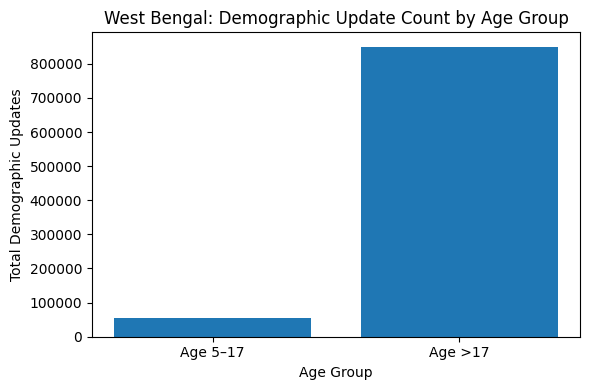

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(
    ['Age 5–17', 'Age >17'],
    age_counts.values
)

plt.title('West Bengal: Demographic Update Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Demographic Updates')

plt.tight_layout()
plt.show()


In [120]:
delhi_df = df[df['state'] == 'Delhi']

delhi_age_counts = delhi_df[['demo_age_5_17', 'demo_age_17_']].sum()


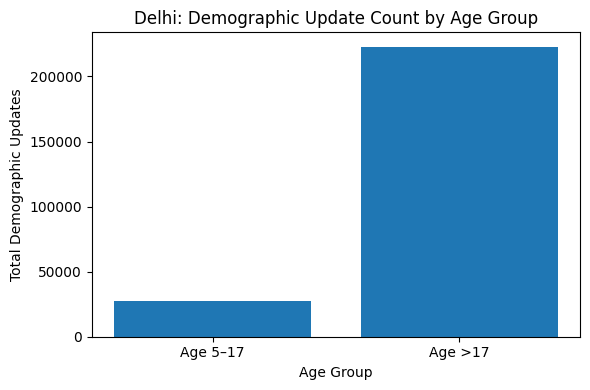

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(
    ['Age 5–17', 'Age >17'],
    delhi_age_counts.values
)

plt.title('Delhi: Demographic Update Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Demographic Updates')

plt.tight_layout()
plt.show()


In [175]:
df['total_demo_updates'] = (
    df['demo_age_5_17'] + df['demo_age_17_']
)


In [176]:
service_places_updates = (
    df.groupby(['state', 'district'])['total_demo_updates']
    .sum()
    .reset_index()
    .sort_values(by='total_demo_updates', ascending=False)
)


In [177]:
service_places_updates

,state,district,total_demo_updates
531,Maharashtra,Pune,94555
540,Maharashtra,Thane,91357
973,West Bengal,South 24 Parganas,89239
958,West Bengal,Murshidabad,87041
370,Karnataka,Bengaluru,74969
...,...,...,...
621,Odisha,Jajapur *,1
972,West Bengal,South 24 Pargana,1
926,Uttaranchal,Udham Singh Nagar *,1
0,100000,100000,1


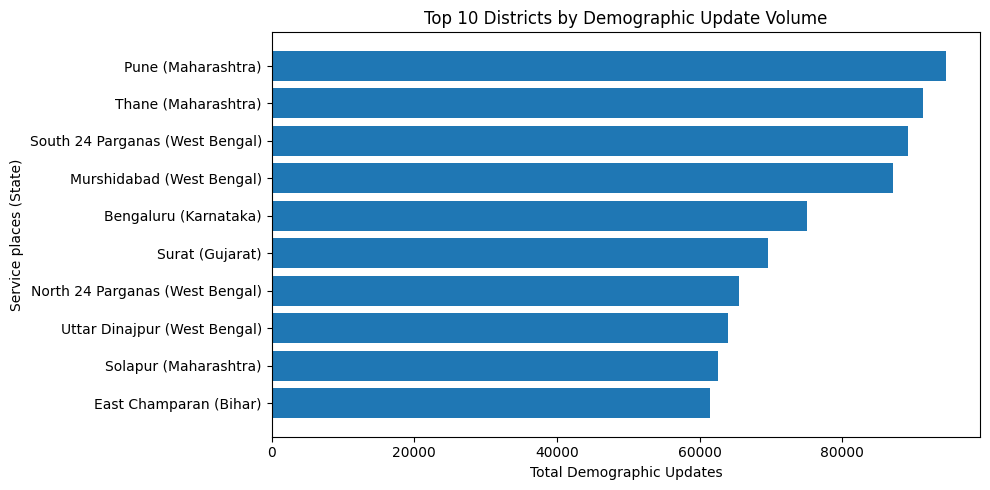

In [178]:
import matplotlib.pyplot as plt

top10 = service_places_updates.head(10)

plt.figure(figsize=(10,5))
plt.barh(
    top10['district'] + ' (' + top10['state'] + ')',
    top10['total_demo_updates']
)

plt.gca().invert_yaxis()
plt.title('Top 10 Districts by Demographic Update Volume')
plt.xlabel('Total Demographic Updates')
plt.ylabel('Service places (State)')

plt.tight_layout()
plt.show()


In [179]:
service_places_updates = (
    df.groupby(['state', 'district'])['total_demo_updates']
    .sum()
    .reset_index()
)


In [180]:
service_places_updates

,state,district,total_demo_updates
0,100000,100000,1
1,Andaman And Nicobar Islands,Andamans,157
2,Andaman And Nicobar Islands,Nicobar,309
3,Andaman And Nicobar Islands,Nicobars,1
4,Andaman And Nicobar Islands,North And Middle Andaman,261
...,...,...,...
980,West Bengal,West Medinipur,5
981,West Bengal,West Midnapore,5841
982,West Bengal,east midnapore,1
983,West Bengal,hooghly,14


In [181]:
least_updates = service_places_updates.sort_values(
    by='total_demo_updates',
    ascending=True
)


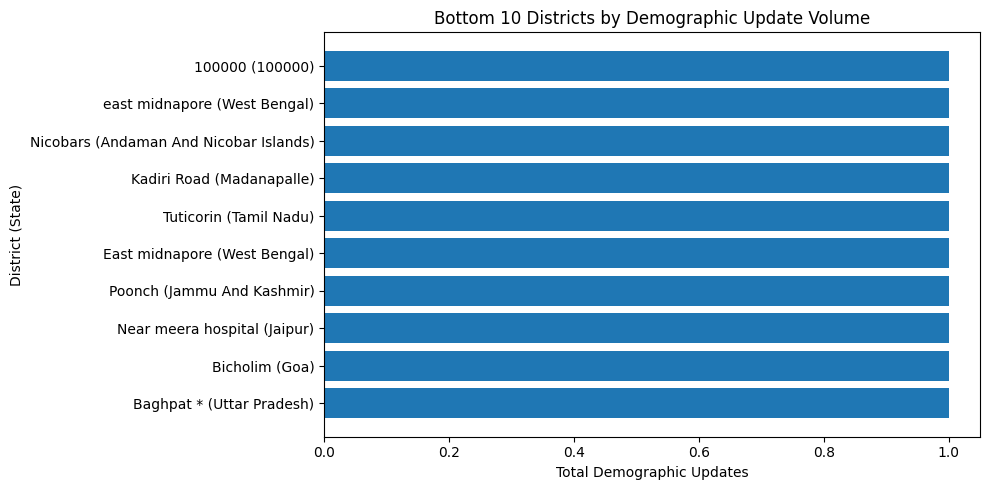

In [182]:
import matplotlib.pyplot as plt

bottom10 = least_updates.head(10)

plt.figure(figsize=(10,5))
plt.barh(
    bottom10['district'] + ' (' + bottom10['state'] + ')',
    bottom10['total_demo_updates']
)

plt.gca().invert_yaxis()
plt.title('Bottom 10 Districts by Demographic Update Volume')
plt.xlabel('Total Demographic Updates')
plt.ylabel('District (State)')

plt.tight_layout()
plt.show()


In [93]:
import pandas as pd
from collections import defaultdict
import glob

In [94]:
state_corrections = {
    'westbengal': 'west bengal',
    'west bangal': 'west bengal',
    'west bengli': 'west bengal',
    'orissa': 'odisha',
    'pondicherry': 'puducherry',
    'chhatisgarh': 'chhattisgarh',
    'jammu and kashmir': 'jammu and kashmir',
    'daman and diu': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'the dadra and nagar haveli and daman and diu':
        'dadra and nagar haveli and daman and diu'
}


In [95]:
def clean_state(state):
    if pd.isna(state):
        return None
    state = state.strip().lower()
    return state_corrections.get(state, state)


def clean_district(district):
    if pd.isna(district):
        return None
    return district.strip().lower()


In [96]:
csv_files = [f for f in glob.glob("*.csv") if f.lower() != "analysed.csv"]

print("Total CSV files found:", len(csv_files))
csv_files



Total CSV files found: 13


['biometric2.csv',
 'biometric3.csv',
 'biometric4.csv',
 'biometrics.csv',
 'cleaned_district_load.csv',
 'enrolment.csv',
 'enrolment2.csv',
 'enrolment3.csv',
 'updaate5.csv',
 'update1.csv',
 'update2.csv',
 'update3.csv',
 'update4.csv']

In [97]:
chunksize = 200000  # safe for large files
district_load = defaultdict(int)


In [98]:
for file in csv_files:
    print("Processing:", file)

    for chunk in pd.read_csv(file, chunksize=chunksize):

        # standardize column names
        chunk.columns = chunk.columns.str.strip().str.lower()

        # clean state & district
        chunk["state"] = chunk["state"].apply(clean_state)
        chunk["district"] = chunk["district"].apply(clean_district)

        chunk.dropna(subset=["state", "district"], inplace=True)

        # 🔍 detect file type by columns
        if {"age_0_5", "age_5_17", "age_18_greater"}.issubset(chunk.columns):
            chunk["row_load"] = (
                chunk["age_0_5"] +
                chunk["age_5_17"] +
                chunk["age_18_greater"]
            )

        elif {"demo_age_5_17", "demo_age_17_"}.issubset(chunk.columns):
            chunk["row_load"] = (
                chunk["demo_age_5_17"] +
                chunk["demo_age_17_"]
            )

        elif {"bio_age_5_17", "bio_age_17_"}.issubset(chunk.columns):
            chunk["row_load"] = (
                chunk["bio_age_5_17"] +
                chunk["bio_age_17_"]
            )

        else:
            print("⚠️ Unknown format:", file)
            continue

        # aggregate district load
        for row in chunk.itertuples(index=False):
            district_load[(row.state, row.district)] += row.row_load


Processing: biometric2.csv
Processing: biometric3.csv
Processing: biometric4.csv
Processing: biometrics.csv
Processing: cleaned_district_load.csv
⚠️ Unknown format: cleaned_district_load.csv
Processing: enrolment.csv
Processing: enrolment2.csv
Processing: enrolment3.csv
Processing: updaate5.csv
Processing: update1.csv
Processing: update2.csv
Processing: update3.csv
Processing: update4.csv


In [99]:
district_df = pd.DataFrame(
    [(s, d, v) for (s, d), v in district_load.items()],
    columns=["state", "district", "total_load"]
)



In [100]:
district_df["state"] = district_df["state"].str.title()
district_df["district"] = district_df["district"].str.title()


In [101]:
district_count_df = (
    district_df
    .groupby("state")["district"]
    .nunique()
    .reset_index(name="total_districts")
)


In [102]:
district_df["load_index"] = (
    district_df["total_load"] /
    district_df.groupby("state")["total_load"].transform("sum")
)


In [103]:
district_df


,state,district,total_load,load_index
0,Goa,North Goa,57968,5.476429e-01
1,Goa,South Goa,47799,4.515730e-01
2,Gujarat,Ahmadabad,30109,5.679454e-03
3,Gujarat,Ahmedabad,692504,1.306269e-01
4,Gujarat,Amreli,100695,1.899408e-02
...,...,...,...,...
1041,Uttaranchal,Tehri Garhwal,2,2.857143e-01
1042,Uttar Pradesh,Jyotiba Phule Nagar *,1,5.225017e-08
1043,Odisha,Bhadrak(R),1,2.702694e-07
1044,Uttar Pradesh,Chitrakoot *,1,5.225017e-08


In [104]:
import matplotlib.pyplot as plt


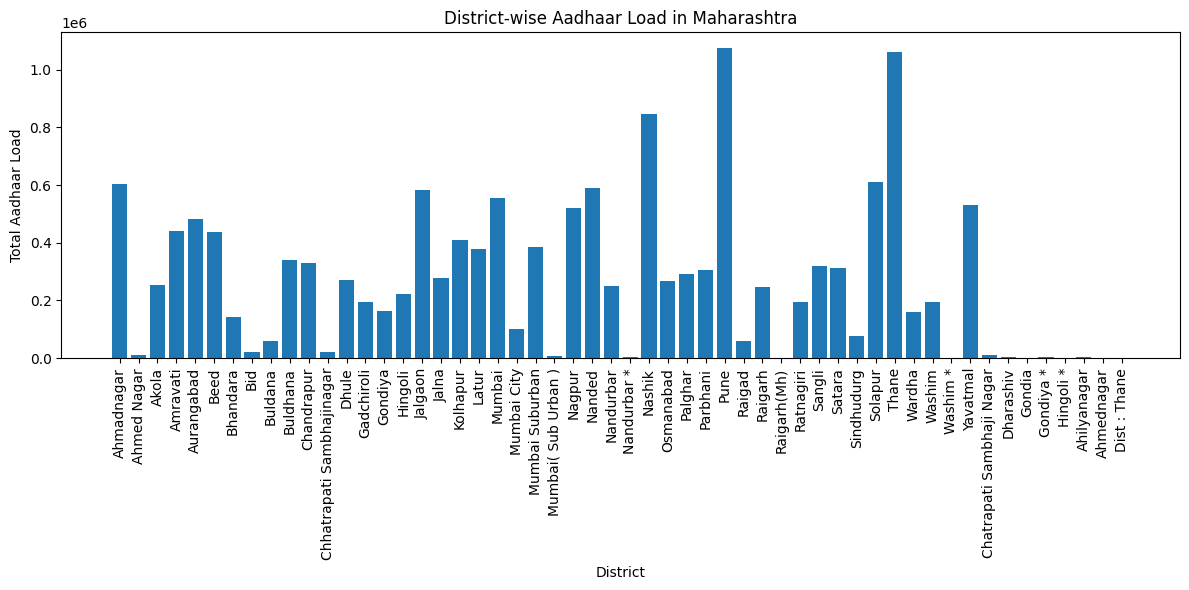

In [106]:
up_df = district_df[district_df["state"] == "Maharashtra"]

plt.figure(figsize=(12,6))
plt.bar(up_df["district"], up_df["total_load"])
plt.xticks(rotation=90)
plt.xlabel("District")
plt.ylabel("Total Aadhaar Load")
plt.title("District-wise Aadhaar Load in Maharashtra")
plt.tight_layout()
plt.show()


In [65]:
state_total_load_df = (
    district_df
    .groupby("state")["total_load"]
    .sum()
    .reset_index(name="state_total_load")
)
state_total_load_df

,state,state_total_load
0,Andaman And Nicobar Islands,24898
1,Andhra Pradesh,6137901
2,Arunachal Pradesh,113181
3,Assam,2225497
4,Bihar,10321522
5,Chandigarh,160566
6,Chhattisgarh,4757391
7,Dadra And Nagar Haveli And Daman And Diu,49608
8,Delhi,2837825
9,Goa,105850


In [66]:
state_district_count_df = (
    district_df
    .groupby("state")["district"]
    .nunique()
    .reset_index(name="district_count")
)


In [68]:
state_load_df = state_total_load_df.merge(
    state_district_count_df,
    on="state",
    how="inner"
)
state_load_df

,state,state_total_load,district_count
0,Andaman And Nicobar Islands,24898,3
1,Andhra Pradesh,6137901,47
2,Arunachal Pradesh,113181,25
3,Assam,2225497,38
4,Bihar,10321522,47
5,Chandigarh,160566,3
6,Chhattisgarh,4757391,41
7,Dadra And Nagar Haveli And Daman And Diu,49608,3
8,Delhi,2837825,14
9,Goa,105850,5


In [70]:
print(state_load_df.columns)


Index(['state', 'state_total_load', 'district_count'], dtype='object')


In [71]:
state_load_df["state_load_index"] = (
    state_load_df["state_total_load"] /
    state_load_df["district_count"]
)


In [72]:
state_load_df.columns



Index(['state', 'state_total_load', 'district_count', 'state_load_index'], dtype='object')

In [73]:
state_load_df = state_load_df.sort_values(
    "state_load_index", ascending=False
)


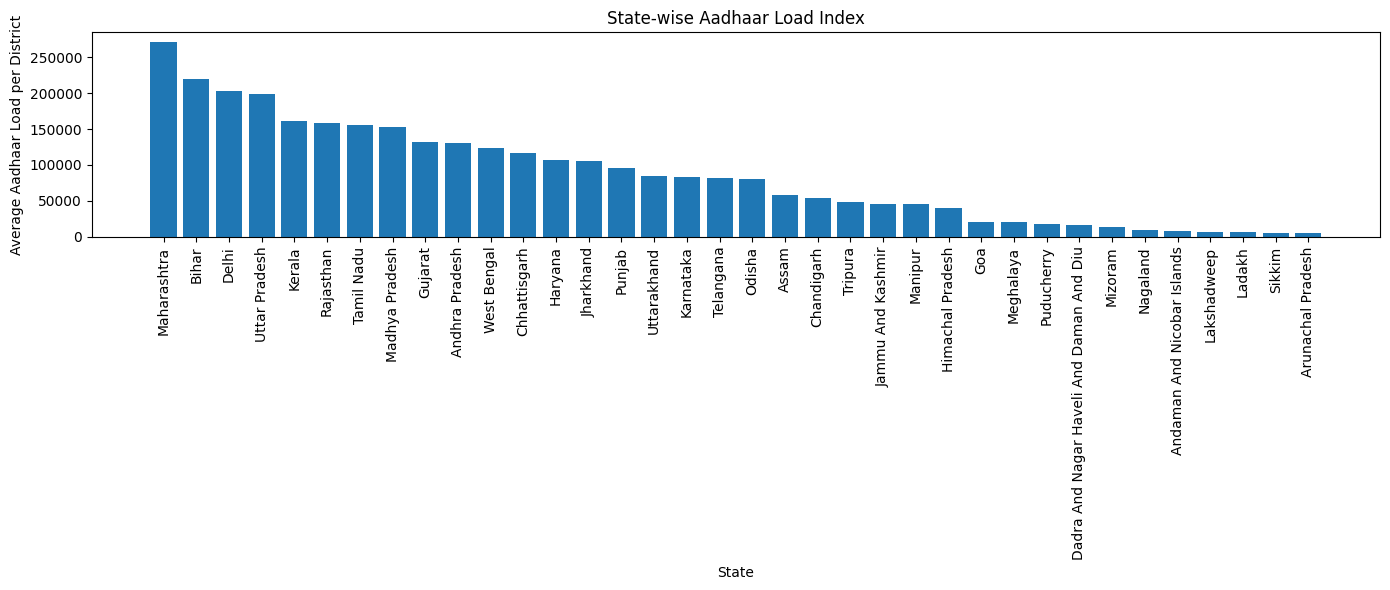

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.bar(state_load_df["state"], state_load_df["state_load_index"])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Average Aadhaar Load per District")
plt.title("State-wise Aadhaar Load Index")
plt.tight_layout()
plt.show()


In [75]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import defaultdict


In [79]:
csv_files = [
    f for f in glob.glob("*.csv")
    if f.lower() not in ["analysed.csv", "cleaned_district_load.csv"]
]

print("Total CSV files:", len(csv_files))
csv_files


Total CSV files: 12


['biometric2.csv',
 'biometric3.csv',
 'biometric4.csv',
 'biometrics.csv',
 'enrolment.csv',
 'enrolment2.csv',
 'enrolment3.csv',
 'updaate5.csv',
 'update1.csv',
 'update2.csv',
 'update3.csv',
 'update4.csv']

In [80]:
date_count = defaultdict(int)


In [81]:
chunksize = 200000

for file in csv_files:
    print("Processing:", file)

    for chunk in pd.read_csv(file, chunksize=chunksize):
        chunk.columns = chunk.columns.str.strip().str.lower()

        # convert date to standard format
        chunk["date"] = pd.to_datetime(
            chunk["date"], errors="coerce", dayfirst=True
        )

        chunk.dropna(subset=["date"], inplace=True)

        # count date occurrences
        for d in chunk["date"]:
            date_count[d.date()] += 1


Processing: biometric2.csv
Processing: biometric3.csv
Processing: biometric4.csv
Processing: biometrics.csv
Processing: enrolment.csv
Processing: enrolment2.csv
Processing: enrolment3.csv
Processing: updaate5.csv
Processing: update1.csv
Processing: update2.csv
Processing: update3.csv
Processing: update4.csv


In [82]:
date_trend_df = pd.DataFrame(
    date_count.items(),
    columns=["date", "occurrence_count"]
).sort_values("date")


In [83]:
date_trend_df


,date,occurrence_count
66,2025-03-01,40371
89,2025-03-02,1
90,2025-03-09,32
91,2025-03-15,28
92,2025-03-20,62
...,...,...
62,2025-12-26,63863
63,2025-12-27,65365
64,2025-12-28,51543
65,2025-12-29,55742


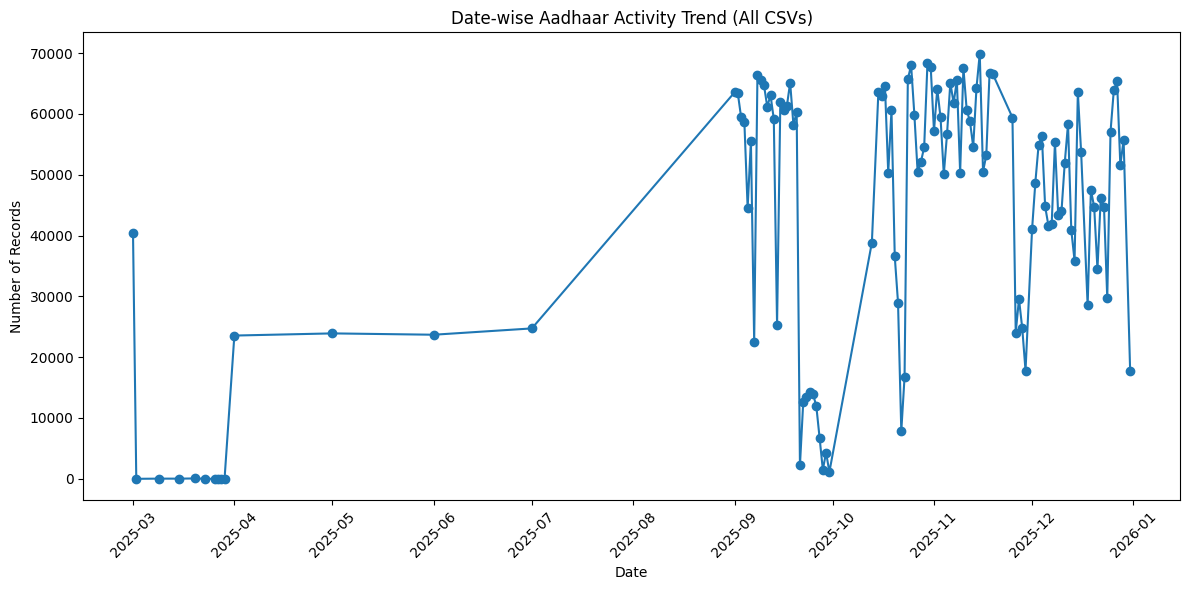

In [84]:
plt.figure(figsize=(12,6))
plt.plot(
    date_trend_df["date"],
    date_trend_df["occurrence_count"],
    marker="o"
)

plt.xlabel("Date")
plt.ylabel("Number of Records")
plt.title("Date-wise Aadhaar Activity Trend (All CSVs)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [85]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import defaultdict


In [86]:
csv_files = [
    f for f in glob.glob("*.csv")
    if f.lower() not in ["analysed.csv", "cleaned_district_load.csv"]
]

print("CSV files:", csv_files)


CSV files: ['biometric2.csv', 'biometric3.csv', 'biometric4.csv', 'biometrics.csv', 'enrolment.csv', 'enrolment2.csv', 'enrolment3.csv', 'updaate5.csv', 'update1.csv', 'update2.csv', 'update3.csv', 'update4.csv']


In [87]:
enrolment_dates = defaultdict(int)
demo_dates = defaultdict(int)
biometric_dates = defaultdict(int)

chunksize = 200000


In [88]:
for file in csv_files:
    print("Processing:", file)

    for chunk in pd.read_csv(file, chunksize=chunksize):

        # standardize column names
        chunk.columns = chunk.columns.str.strip().str.lower()

        # parse date
        chunk["date"] = pd.to_datetime(
            chunk["date"], errors="coerce", dayfirst=True
        )

        chunk.dropna(subset=["date"], inplace=True)

        # 🔍 identify CSV type by columns
        if {"age_0_5", "age_5_17", "age_18_greater"}.issubset(chunk.columns):
            for d in chunk["date"]:
                enrolment_dates[d.date()] += 1

        elif {"demo_age_5_17", "demo_age_17_"}.issubset(chunk.columns):
            for d in chunk["date"]:
                demo_dates[d.date()] += 1

        elif {"bio_age_5_17", "bio_age_17_"}.issubset(chunk.columns):
            for d in chunk["date"]:
                biometric_dates[d.date()] += 1


Processing: biometric2.csv
Processing: biometric3.csv
Processing: biometric4.csv
Processing: biometrics.csv
Processing: enrolment.csv
Processing: enrolment2.csv
Processing: enrolment3.csv
Processing: updaate5.csv
Processing: update1.csv
Processing: update2.csv
Processing: update3.csv
Processing: update4.csv


In [89]:
enrolment_df = pd.DataFrame(
    enrolment_dates.items(),
    columns=["date", "count"]
).sort_values("date")

demo_df = pd.DataFrame(
    demo_dates.items(),
    columns=["date", "count"]
).sort_values("date")

biometric_df = pd.DataFrame(
    biometric_dates.items(),
    columns=["date", "count"]
).sort_values("date")


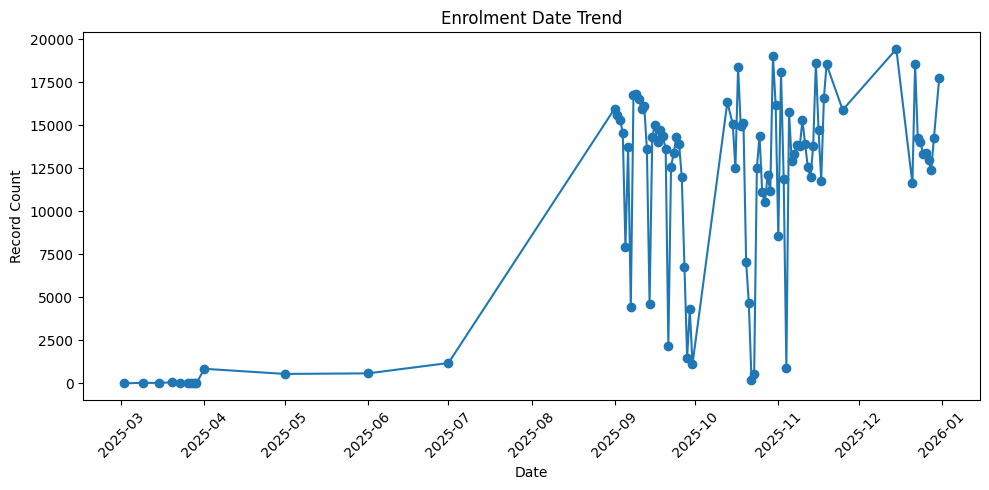

In [90]:
plt.figure(figsize=(10,5))
plt.plot(enrolment_df["date"], enrolment_df["count"], marker="o")
plt.xlabel("Date")
plt.ylabel("Record Count")
plt.title("Enrolment Date Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


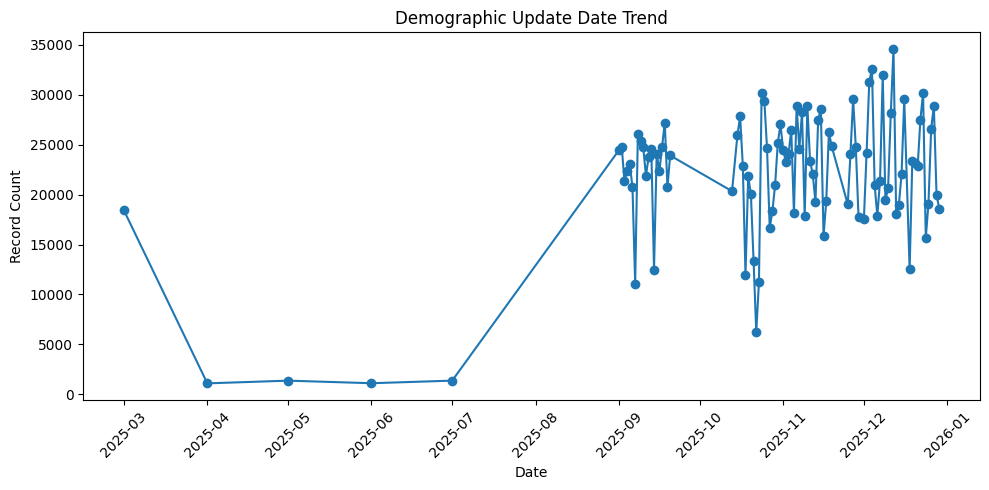

In [91]:
plt.figure(figsize=(10,5))
plt.plot(demo_df["date"], demo_df["count"], marker="o")
plt.xlabel("Date")
plt.ylabel("Record Count")
plt.title("Demographic Update Date Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


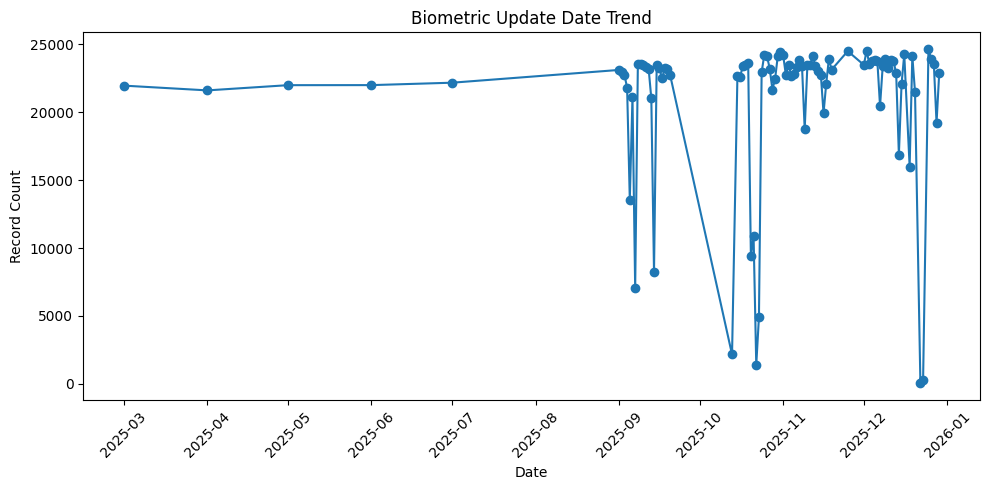

In [92]:
plt.figure(figsize=(10,5))
plt.plot(biometric_df["date"], biometric_df["count"], marker="o")
plt.xlabel("Date")
plt.ylabel("Record Count")
plt.title("Biometric Update Date Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
